<a href="https://colab.research.google.com/github/sid781/Loan-Prediction/blob/master/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
train = df_train.copy()
test = df_test.copy()

Numerical Columns

In [ ]:
num = train.select_dtypes(exclude=['object']).columns
train[num].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [ ]:
term = train[num].iloc[:,-2:].columns
income=train[num].iloc[:,:-2].columns

Categorical columns

In [ ]:
cat = train.select_dtypes(include=['object']).columns[1:-1]
train[cat].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


Missing Values

In [ ]:
#help(SimpleImputer())

In [ ]:
from sklearn.impute import SimpleImputer
imputer_inc= SimpleImputer(missing_values = np.nan, strategy='mean' ,verbose = 0)
train[income]= imputer_inc.fit_transform(train[income])
test[income]= imputer_inc.transform(test[income])

In [ ]:
imputer_term= SimpleImputer(missing_values = np.nan, strategy='most_frequent' ,verbose = 0)
train[term]= imputer_term.fit_transform(train[term])
test[term]= imputer_term.transform(test[term])

In [ ]:
#help(df.dropna)
train.dropna(axis=0, how='any', subset=cat, inplace=True)
test.dropna(axis=0, how='any', subset=cat, inplace=True)

In [ ]:
train.shape, test.shape

((554, 13), (324, 12))

Variable Seperation

In [ ]:
X_train= train.iloc[:,1:-1].values
y_train = train.iloc[:,-1].values
X_test = test.iloc[:,1:].values

In [ ]:
X_train.shape

(554, 11)

In [ ]:
X_test.shape

(324, 11)

In [ ]:
y_train.shape

(554,)

Train-test Split

In [ ]:
# from sklearn.model_selection import train_test_split

Visualisation

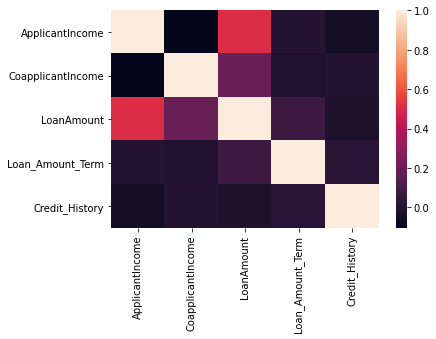

In [ ]:
sns.heatmap(train[num].corr())

Encoding of variables

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

label = LabelEncoder()

y_train = label.fit_transform(y_train)

In [ ]:
y_train[:5]

array([1, 0, 1, 1, 1])

In [ ]:
#help(OneHotEncoder)
onehot = OneHotEncoder()

ct = ColumnTransformer([('encoder', onehot, [0, 1, 2, 3, 4, 10])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.transform(X_test))

In [ ]:
X_train.shape, X_test.shape

((554, 20), (324, 20))

In [ ]:
X_train[1], X_test[1]

(array([0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0,
        0.0, 0.0, 4583.0, 1508.0, 128.0, 360.0, 1.0], dtype=object),
 array([0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 1.0, 3076.0, 1500.0, 126.0, 360.0, 1.0], dtype=object))

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[-5:] = sc.fit_transform(X_train[-5:])
X_test[-5:] = sc.transform(X_test[-5:])

Training

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=200, random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Prediction

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [ ]:
from sklearn.model_selection import cross_val_score
#help(cross_val_score)
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
# print(accuracies.mean())
# print(accuracies.std())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.807012987012987
0.04487623767327064


In [33]:
target = []
for i in y_pred:
  if i==1: 
    target.append('Y')
  else:
    target.append('N')

In [34]:
target

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y'

In [35]:
test['Loan_Status']= target
sub=test[['Loan_ID', 'Loan_Status']]
sub

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [36]:
sub.to_csv('submission.csv')